## Lab03
### 載入套件

In [27]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers

In [28]:
pokemon_df = pd.read_csv('./data/pokemon.csv')  # 讀取寶可夢數據
pokemon_df.head()  # 顯示頭5比資料

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [29]:
pokemon_df= pokemon_df.set_index("#")  # 將索引設定為'#'列
pokemon_df.head()  # 顯示頭5比資料

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [30]:
combats_df = pd.read_csv('./data/combats.csv')  # 讀取對戰數據
combats_df.head()  # 顯示頭5比資料

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


## 補齊缺失 資料

In [31]:
pokemon_df.info()  # 顯示精靈寶可夢的數據資訊

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 1 to 800
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        799 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   HP          800 non-null    int64 
 4   Attack      800 non-null    int64 
 5   Defense     800 non-null    int64 
 6   Sp. Atk     800 non-null    int64 
 7   Sp. Def     800 non-null    int64 
 8   Speed       800 non-null    int64 
 9   Generation  800 non-null    int64 
 10  Legendary   800 non-null    bool  
dtypes: bool(1), int64(7), object(3)
memory usage: 69.5+ KB


查看Type2每個類別的數量：

透過傳入參數dropna=False，可以將缺失數據（NaN）也考慮進去，NaN代表寶可夢並沒有第二種屬性。

In [32]:
# 計算 Type 2 欄位中每個類別的出現次數，包括缺失值（NaN）
pokemon_df["Type 2"].value_counts(dropna=False)

Type 2
NaN         386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Ice          14
Rock         14
Water        14
Ghost        14
Fire         12
Electric      6
Normal        4
Bug           3
Name: count, dtype: int64

填補缺失數據：使用empty將缺失的欄位填上。

In [33]:
# 將缺失的'Type 2'欄位填充為'empty'
pokemon_df["Type 2"].fillna('empty',inplace=True)
# 計算填充後的'Type 2'欄位中每個類別的出現次數
pokemon_df["Type 2"].value_counts()

C:\Users\user\AppData\Local\Temp\ipykernel_15748\4017565956.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pokemon_df["Type 2"].fillna('empty',inplace=True)


Type 2
empty       386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Ice          14
Rock         14
Water        14
Ghost        14
Fire         12
Electric      6
Normal        4
Bug           3
Name: count, dtype: int64

## 數據前處理
檢查資料型態

In [34]:
print(combats_df.dtypes)  # 顯示對戰數據的資料型態
print('-' * 30)
print(pokemon_df.dtypes)  # 顯示寶可夢數據的資料型態

First_pokemon     int64
Second_pokemon    int64
Winner            int64
dtype: object
------------------------------
Name          object
Type 1        object
Type 2        object
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object


轉換數據格式

In [35]:
pokemon_df['Type 1'] = pokemon_df['Type 1'].astype('category')  # 將'Type 1'轉成category型態
pokemon_df['Type 2'] = pokemon_df['Type 2'].astype('category')  # 將'Type 2'轉成category型態
pokemon_df['Legendary'] = pokemon_df['Legendary'].astype('int')  # 將'Legendary'轉成int型態
pokemon_df.dtypes  # 顯示目前寶可用數據集資料型態

Name            object
Type 1        category
Type 2        category
HP               int64
Attack           int64
Defense          int64
Sp. Atk          int64
Sp. Def          int64
Speed            int64
Generation       int64
Legendary        int32
dtype: object

將寶可夢的Type1和Type2轉為One-hot Encoding表示：

In [36]:
df_type1_one_hot = pd.get_dummies(pokemon_df['Type 1'])  # 取得'Type 1'數據的One-hot編碼
df_type1_one_hot.head()  # 顯示頭5比資料

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
#,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False


使用Pandas的get_dummies函數，取得Type2（寶可夢第二種屬性）的One-hot Encoding：

In [37]:
df_type2_one_hot = pd.get_dummies(pokemon_df['Type 2'])  # 取得'Type 2'數據的One-hot編碼
df_type2_one_hot.head()  # 顯示頭5比資料

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,empty
#,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


將兩組One-hot Encoding合併回數據集：

In [38]:
# 將上方兩個One-hot編碼資料加起來，將缺少的值補0，並轉呈int64型態
combine_df_one_hot = df_type1_one_hot.add(df_type2_one_hot, fill_value=0).astype('int64')
# 將顯示列數設定為30，不然會有部份資料無法顯示
pd.options.display.max_columns = 30
# 將One-hot編碼資料加到寶可夢數據中
pokemon_df = pokemon_df.join(combine_df_one_hot)
pokemon_df.head()  # 顯示頭5比資料

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,empty
#,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
5,Charmander,Fire,empty,39,52,43,60,50,65,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


將寶可夢屬性轉為數值表示（0, 1, 2, …18）：透過cat.categories查詢類別的標籤。

In [39]:
# 將'Type 2'的類別轉換為字典，key為索引，value為類別名稱
dict(enumerate(pokemon_df['Type 2'].cat.categories))

{0: 'Bug',
 1: 'Dark',
 2: 'Dragon',
 3: 'Electric',
 4: 'Fairy',
 5: 'Fighting',
 6: 'Fire',
 7: 'Flying',
 8: 'Ghost',
 9: 'Grass',
 10: 'Ground',
 11: 'Ice',
 12: 'Normal',
 13: 'Poison',
 14: 'Psychic',
 15: 'Rock',
 16: 'Steel',
 17: 'Water',
 18: 'empty'}

透過cat.codes可以取得類別的編碼值。

In [40]:
# 使用cat.codes方法將'Type 2'的類別編碼為數值
pokemon_df['Type 2'].cat.codes.head(10)

#
1     13
2     13
3     13
4     13
5     18
6     18
7      7
8      2
9      7
10    18
dtype: int8

用數值表示（0, 1, 2…18）取代原本的標籤值：

In [41]:
# 將'Type 1'的類別轉換為數值表示
pokemon_df['Type 1'] = pokemon_df['Type 1'].cat.codes
# 將'Type 2'的類別轉換為數值表示
pokemon_df['Type 2'] = pokemon_df['Type 2'].cat.codes
# 顯示頭5比資料
pokemon_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,empty
#,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Bulbasaur,9,13,45,49,49,65,65,45,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,Ivysaur,9,13,60,62,63,80,80,60,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,Venusaur,9,13,80,82,83,100,100,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,Mega Venusaur,9,13,80,100,123,122,120,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
5,Charmander,6,18,39,52,43,60,50,65,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


將沒有使用到的資料剔除（name）：

In [42]:
# 從DataFrame中刪除'Name'這一列，並且不創造新的DataFrame，直接修改原有的DataFrame
pokemon_df.drop('Name', axis='columns', inplace=True)
# 顯示修改後的DataFrame的頭5行資料
pokemon_df.head()

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,empty
#,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,9,13,45,49,49,65,65,45,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,9,13,60,62,63,80,80,60,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,9,13,80,82,83,100,100,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,9,13,80,100,123,122,120,80,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
5,6,18,39,52,43,60,50,65,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


將寶可夢對戰數據中勝利方的表示改為0與1：

In [43]:
# 使用apply方法將'Winner'列轉換為0或1，根據'Winner'是否等於'First_pokemon'。
combats_df['Winner'] = combats_df.apply(lambda x: 0 if x.Winner == x.First_pokemon else 1, axis='columns')
# 顯示轉換後的DataFrame的頭5行資料。
combats_df.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,1
1,702,701,1
2,191,668,1
3,237,683,1
4,151,231,0


## 分割數據集
將數據集分為3個部份分別為：

- 訓練集
- 驗證集
- 測試集

In [44]:
# 取得對戰數據的總數量
data_num = combats_df.shape[0]
# 生成與data數量相同的亂數索引，主要用於打散資料以進行隨機抽樣
indexes = np.random.permutation(data_num)
# 將亂數索引值分為訓練集、驗證集和測試集，比例分別為6:2:2
train_indexes = indexes[:int(data_num *0.6)]  # 訓練集索引
val_indexes = indexes[int(data_num *0.6):int(data_num *0.8)]  # 驗證集索引
test_indexes = indexes[int(data_num *0.8):]  # 測試集索引
# 使用上方的索引值從對戰數據中提取對應的資料
train_data = combats_df.loc[train_indexes]  # 訓練集資料
val_data = combats_df.loc[val_indexes]  # 驗證集資料
test_data = combats_df.loc[test_indexes]  # 測試集資料

## Normalization 標準化

將數值表示的屬性除以19(因為加上empty共有19種屬性)，讓數值縮放置0~1之間。

In [45]:
pokemon_df['Type 1'] = pokemon_df['Type 1'] / 19
pokemon_df['Type 2'] = pokemon_df['Type 2'] / 19


使用Standard Score將生命值、攻擊力和防禦力等數值標準化。

In [46]:
mean = pokemon_df.loc[:, 'HP':'Generation'].mean()  # 計算平均值
std = pokemon_df.loc[:, 'HP':'Generation'].std()  # 計算標準差
# 標準化數據
pokemon_df.loc[:,'HP':'Generation'] = (pokemon_df.loc[:,'HP':'Generation']-mean)/std
pokemon_df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_15748\1133053848.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.95003189 -0.36259526  0.42065358  0.42065358 -1.18500655 -0.44092015
  0.3423287   0.3423287   0.3423287  -0.98919434 -0.4017577   0.38149114
  0.38149114 -0.95003189 -0.75421968 -0.36259526 -1.14584411 -0.95003189
 -0.16678305 -0.16678305 -1.14584411 -0.24510794  0.53814091  0.53814091
 -1.53746853 -0.55840747 -1.14584411 -0.16678305 -1.34165632 -0.36259526
 -1.34165632 -0.36259526 -0.75421968  0.22484137 -0.55840747  0.02902916
  0.812278   -0.91086945 -0.32343282  0.45981602  0.02902916  1.00809022
 -1.22416899  0.14651649  1.79133906  2.77040011 -1.14584411  0.22484137
 -0.95003189 -0.36259526  0.22484137 -1.34165632 -0.36259526 -0.36259526
  0.02902916 -2.32071737 -1.34165632 -1.14584411 -0.16678305 -0.75421968
  0.42065358 -1.14584411 -0.16678305 -0.55840747  0.812278   -1.14584411
 -0.16678305 

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,empty
#,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.473684,0.684211,-0.950032,-0.924328,-0.796655,-0.238981,-0.248033,-0.801002,-1.398762,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,0.473684,0.684211,-0.362595,-0.523803,-0.347700,0.219422,0.290974,-0.284837,-1.398762,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,0.473684,0.684211,0.420654,0.092390,0.293665,0.830626,1.009651,0.403383,-1.398762,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,0.473684,0.684211,0.420654,0.646964,1.576395,1.502951,1.728328,0.403383,-1.398762,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
5,0.315789,0.947368,-1.185007,-0.831899,-0.989065,-0.391782,-0.787041,-0.112782,-1.398762,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


## 建立Numpy array格式的訓練數據

準備對戰數據中每個寶可夢對應能力值的索引。

In [47]:
x_train_index = np.array(train_data.drop('Winner', axis='columns'))
x_val_index = np.array(val_data.drop('Winner', axis='columns'))
x_test_index = np.array(test_data.drop('Winner', axis='columns'))
print(x_train_index)

[[462 600]
 [328  45]
 [592 746]
 ...
 [422 132]
 [685 548]
 [221 256]]


## 準備訓練目標

In [48]:
y_train = np.array(train_data['Winner'])
y_val = np.array(val_data['Winner'])
y_test = np.array(test_data['Winner'])

準備兩種輸入數據：

第一種：寶可夢的屬性為數值表示。

In [49]:
# 取得寶可夢的能力值
# 將pokemon_df的資料轉換為numpy array，選擇從第一列到'Legendary'列的所有資料
pokemon_data_normal = np.array(pokemon_df.loc[:, :'Legendary'])
# 印出轉換後的numpy array的形狀
print(pokemon_data_normal.shape)
# 透過前面準備的索引產生輸入數據
# 使用x_train_index - 1作為索引，從pokemon_data_normal中選擇對應的資料，然後重塑為(-1, 20)的形狀
x_train_normal = pokemon_data_normal[x_train_index -1].reshape((-1, 20))
# 使用x_val_index - 1作為索引，從pokemon_data_normal中選擇對應的資料，然後重塑為(-1, 20)的形狀
x_val_normal = pokemon_data_normal[x_val_index -1].reshape((-1, 20))
# 使用x_test_index - 1作為索引，從pokemon_data_normal中選擇對應的資料，然後重塑為(-1, 20)的形狀
x_test_normal = pokemon_data_normal[x_test_index -1].reshape((-1, 20))
# 印出x_train_normal的形狀
print(x_train_normal.shape)

(800, 10)
(30000, 20)


第二種：寶可夢的屬性為One-hot encoding表示。

In [50]:
# 取得寶可夢的能力值
# 這裡我們使用numpy將pokemon_df的資料轉換為numpy array，選擇從'HP'列到最後一列的所有資料
pokemon_data_one_hot = np.array(pokemon_df.loc[:, 'HP':])
# 印出轉換後的numpy array的形狀
print(pokemon_data_one_hot.shape)
# 透過前面準備的索引產生輸入數據
# 使用x_train_index - 1作為索引，從pokemon_data_one_hot中選擇對應的資料，然後重塑為(-1, 54)的形狀
x_train_one_hot = pokemon_data_one_hot[x_train_index -1].reshape((-1, 54))
# 使用x_val_index - 1作為索引，從pokemon_data_one_hot中選擇對應的資料，然後重塑為(-1, 54)的形狀
x_val_one_hot = pokemon_data_one_hot[x_val_index -1].reshape((-1, 54))
# 使用x_test_index - 1作為索引，從pokemon_data_one_hot中選擇對應的資料，然後重塑為(-1, 54)的形狀
x_test_one_hot = pokemon_data_one_hot[x_test_index -1].reshape((-1, 54))
# 印出x_train_one_hot的形狀
print(x_train_one_hot.shape)

(800, 27)
(30000, 54)


使用數值編碼訓練網路（Model 1）

In [51]:
inputs = keras.Input(shape=(20, ))  # 定義輸入層的形狀為20維
# 首先加入一層全連接層，輸出維度為64，使用ReLU激活函數，並且每次訓練時隨機丟棄30%的神經元以避免過擬合
x = layers.Dense(64, activation='relu')(inputs)
x = layers.Dropout(0.3)(x)  # 隨機丟棄30%的神經元
# 接著加入第二層全連接層，輸出維度為128，使用ReLU激活函數，並且每次訓練時隨機丟棄30%的神經元以避免過擬合
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.3)(x)  # 隨機丟棄30%的神經元
# 再加入第三層全連接層，輸出維度為64，使用ReLU激活函數，並且每次訓練時隨機丟棄30%的神經元以避免過擬合
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.3)(x)  # 隨機丟棄30%的神經元
# 最後加入第四層全連接層，輸出維度為32，使用ReLU激活函數，並且每次訓練時隨機丟棄30%的神經元以避免過擬合
x = layers.Dense(32, activation='relu')(x)
x = layers.Dropout(0.3)(x)  # 隨機丟棄30%的神經元
# 最後一層全連接層，輸出維度為1，使用sigmoid激活函數以進行二元分類
# outputs = layers.Dense(1, activation='sigmoid')(x)
outputs = layers.Dense(1)(x)  # 最後一層全連接層，輸出維度為1


# 建立網路模型(將輸入到輸出所有經過的網路層連接起來)
model_1 = keras.Model(inputs, outputs, name='model-1')
model_1.summary()  # 顯示網路架構

Model: "model-1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,033 (78.25 KB)

 Trainable params: 20,033 (78.25 KB)

 Non-trainable params: 0 (0.00 B)

創建紀錄檔目錄

In [52]:
model_dir = "lab3-logs/models"  # 設定儲存權重目錄
os.makedirs(model_dir, exist_ok=True)  # 創建儲存權重目錄

建立Callback function：

In [54]:
# 儲存訓練記錄檔
log_dir = os.path.join('lab3-logs', 'model-1')
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)
# 儲存最好的網路模型權重
model_mckp = keras.callbacks.ModelCheckpoint(model_dir + '/Best-model-1.keras', 
                                             monitor='val_binary_accuracy', 
                                             save_best_only=True, 
                                             mode='max')

設定訓練使用的優化器、損失函數和指標函數

In [55]:
model_1.compile(keras.optimizers.Adam(),
               # loss=keras.losses.BinaryCrossentropy(), 
               loss=keras.losses.BinaryCrossentropy(from_logits=True), 
               metrics=[keras.metrics.BinaryAccuracy()])

訓練網路模型

In [56]:
history_1 = model_1.fit(x_train_normal, y_train, 
                batch_size=64 ,
                epochs=200, 
                validation_data=(x_val_normal, y_val),
                callbacks=[model_cbk, model_mckp])

Epoch 1/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - binary_accuracy: 0.7427 - loss: 0.4960 - val_binary_accuracy: 0.9007 - val_loss: 0.3071
Epoch 2/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - binary_accuracy: 0.8803 - loss: 0.3324 - val_binary_accuracy: 0.9267 - val_loss: 0.2304
Epoch 3/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - binary_accuracy: 0.9055 - loss: 0.2732 - val_binary_accuracy: 0.9357 - val_loss: 0.1983
Epoch 4/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - binary_accuracy: 0.9129 - loss: 0.2474 - val_binary_accuracy: 0.9379 - val_loss: 0.1919
Epoch 5/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - binary_accuracy: 0.9225 - loss: 0.2288 - val_binary_accuracy: 0.9381 - val_loss: 0.1909
Epoch 6/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - binary_accuracy: 0.9247 - loss: 0.2171 - val_binary_accuracy: 0.9389 - val_loss: 0.1805
Epoch 7/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - binary_accuracy: 0.9293 - loss: 0.2040 - val_binary_accuracy: 0.9416 - val_loss: 0.1818

## 使用One-hot編碼訓練網路（Model 2）

In [57]:
inputs = keras.Input(shape=(54, ))  # 建立輸入層，指定輸入形狀為54維向量
# 加入多層全連接層，每一層輸出使用ReLU激活函數，並加上Dropout(每次丟棄30%)
x = layers.Dense(64, activation='relu')(inputs)  # 第一層全連接層，64個神經元，使用ReLU激活函數
x = layers.Dropout(0.3)(x)  # 加入Dropout層，隨機丟棄30%的神經元，防止過擬合
x = layers.Dense(128, activation='relu')(x)  # 第二層全連接層，128個神經元，使用ReLU激活函數
x = layers.Dropout(0.3)(x)  # 再次加入Dropout層，隨機丟棄30%的神經元
x = layers.Dense(64, activation='relu')(x)  # 第三層全連接層，64個神經元，使用ReLU激活函數
x = layers.Dropout(0.3)(x)  # 再次加入Dropout層，隨機丟棄30%的神經元
x = layers.Dense(32, activation='relu')(x)  # 第四層全連接層，32個神經元，使用ReLU激活函數
x = layers.Dropout(0.3)(x)  # 最後一次加入Dropout層，隨機丟棄30%的神經元
# 最後一層全連接層，輸出維度為1（二元分類問題），不使用激活函數（為了配合from_logits=True的損失函數）
outputs = layers.Dense(1)(x)  # 輸出層，1個神經元，用於二元分類
# outputs = layers.Dense(1, activation='sigmoid')(x)  # 如果使用sigmoid激活函數，則需要將這行取消註釋，並註釋掉上面的outputs行

# 建立網路模型(將輸入到輸出所有經過的網路層連接起來)
model_2 = keras.Model(inputs, outputs, name='model-2')  # 使用函數式API創建模型，指定輸入和輸出
model_2.summary()  # 顯示網路架構，包括每層的輸出形狀和參數數量

Model: "model-2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 54)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         3,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,209 (86.75 KB)

 Trainable params: 22,209 (86.75 KB)

 Non-trainable params: 0 (0.00 B)

建立Callback function：

In [59]:
# 定義儲存訓練記錄檔的路徑
log_dir = os.path.join('lab3-logs', 'model-2')  # 使用os.path.join方法將目錄和檔案名合成完整的路徑
# 創建TensorBoard回調函數，用于儲存訓練過程中的記錄
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)  # 創建TensorBoard回調函數，並指定日誌目錄
# 定義儲存最好模型權重的路徑和條件
model_mckp = keras.callbacks.ModelCheckpoint(model_dir + '/Best-model-2.keras', 
                                         monitor='val_binary_accuracy', 
                                         save_best_only=True, 
                                         mode='max')  # 創建ModelCheckpoint回調函數，監控驗證集的二元準確率，僅保存最好的模型，且以最大值為目標

設定訓練使用的優化器、損失函數和指標函數

In [60]:
# 使用Adam優化器進行模型編譯
model_2.compile(keras.optimizers.Adam(), 
               # loss=keras.losses.BinaryCrossentropy(), 
               # 使用二元交叉熵損失函數，並設置from_logits為True，以便與sigmoid激活函數配合使用
               loss=keras.losses.BinaryCrossentropy(from_logits=True), 
               # 設置模型的評估指標為二元準確率
               metrics=[keras.metrics.BinaryAccuracy()])

訓練網路模型

In [61]:
# 使用模型進行訓練，設定訓練參數
history_2 = model_2.fit(x_train_one_hot, y_train, 
                    # 設定批次大小為64
                    batch_size=64 ,
                    # 設定訓練的epochs為200
                    epochs=200, 
                    # 設定驗證集的資料
                    validation_data=(x_val_one_hot, y_val), 
                    # 使用回調函數，包括TensorBoard和ModelCheckpoint
                    callbacks=[model_cbk, model_mckp])

Epoch 1/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - binary_accuracy: 0.7281 - loss: 0.5055 - val_binary_accuracy: 0.8946 - val_loss: 0.3073
Epoch 2/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - binary_accuracy: 0.8742 - loss: 0.3442 - val_binary_accuracy: 0.9203 - val_loss: 0.2315
Epoch 3/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - binary_accuracy: 0.9010 - loss: 0.2746 - val_binary_accuracy: 0.9284 - val_loss: 0.2030
Epoch 4/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - binary_accuracy: 0.9098 - loss: 0.2493 - val_binary_accuracy: 0.9224 - val_loss: 0.1896
Epoch 5/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - binary_accuracy: 0.9196 - loss: 0.2159 - val_binary_accuracy: 0.9309 - val_loss: 0.1756
Epoch 6/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - binary_accuracy: 0.9210 - loss: 0.2059 - val_binary_accuracy: 0.9342 - val_loss: 0.1682
Epoch 7/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - binary_accuracy: 0.9234 - loss: 0.1991 - val_binary_accuracy: 0.9371 - val_loss: 0.1596

## 比較兩種網路的訓練結果

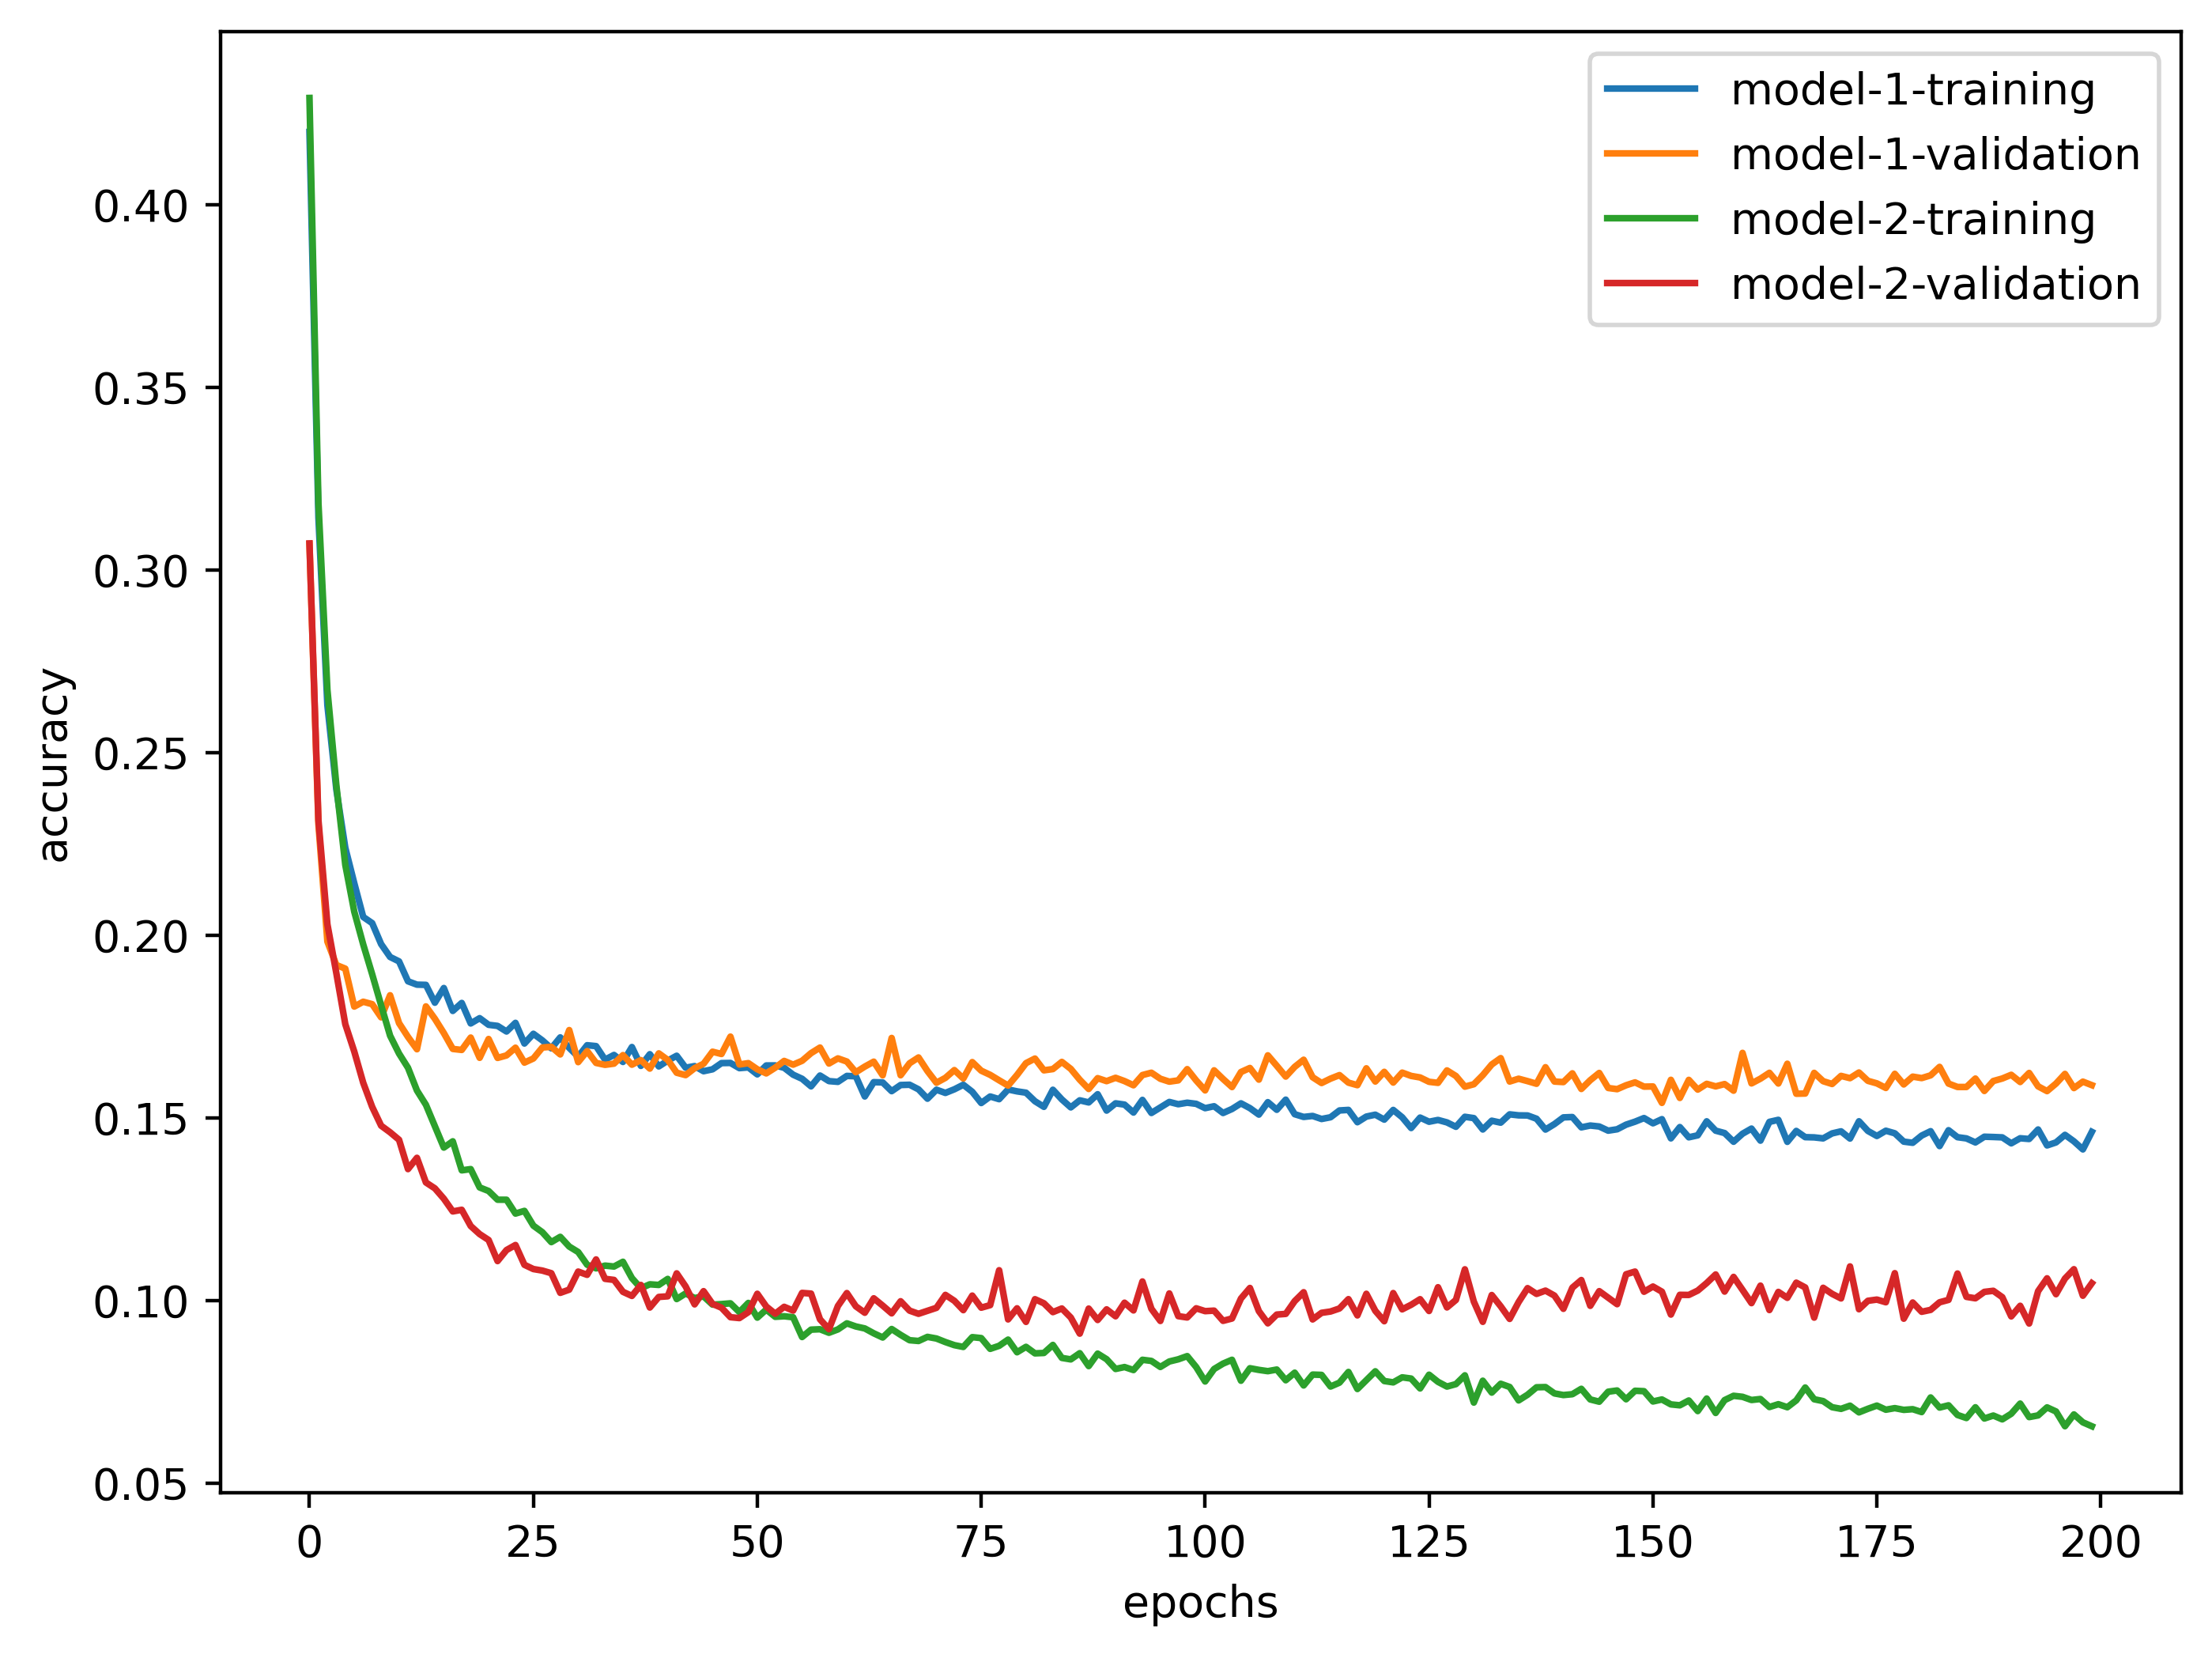

In [62]:
plt.figure(figsize=(8, 6), dpi=400)  # 創建圖形，設定大小和解析度
plt.plot(history_1.history['loss'], label='model-1-training')  # 繪製模型1的訓練損失曲線
plt.plot(history_1.history['val_loss'], label='model-1-validation')  # 繪製模型1的驗證損失曲線
plt.plot(history_2.history['loss'], label='model-2-training')  # 繪製模型2的訓練損失曲線
plt.plot(history_2.history['val_loss'], label='model-2-validation')  # 繪製模型2的驗證損失曲線
plt.ylabel('accuracy')  # 設定y軸標籤為準確率
plt.xlabel('epochs')  # 設定x軸標籤為epochs
plt.legend()  # 顯示圖例

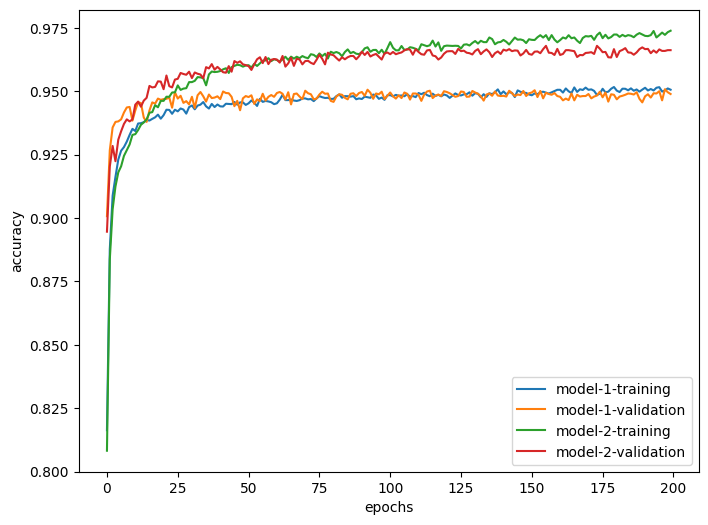

In [63]:
# 創建圖形，設定大小為8x6英寸
plt.figure(figsize=(8, 6))
# 繪製模型1的訓練準確率曲線，並標籤為'model-1-training'
plt.plot(history_1.history['binary_accuracy'], label='model-1-training')
# 繪製模型1的驗證準確率曲線，並標籤為'model-1-validation'
plt.plot(history_1.history['val_binary_accuracy'], label='model-1-validation')
# 繪製模型2的訓練準確率曲線，並標籤為'model-2-training'
plt.plot(history_2.history['binary_accuracy'], label='model-2-training')
# 繪製模型2的驗證準確率曲線，並標籤為'model-2-validation'
plt.plot(history_2.history['val_binary_accuracy'], label='model-2-validation')
# 設定y軸標籤為準確率
plt.ylabel('accuracy')
# 設定x軸標籤為epochs
plt.xlabel('epochs')
# 顯示圖例
plt.legend()

## 不想重新訓練，直接載入預訓好的模型

In [67]:
# 建立網路模型(將輸入到輸出所有經過的網路層連接起來)
use_pretain_model = True
if use_pretain_model is True:
    model_1 = keras.models.load_model(model_dir + "/Best-model-1.keras", compile=False)
    model_2 = keras.models.load_model(model_dir + "/Best-model-2.keras", compile=False)
    model_1.compile(optimizer=keras.optimizers.Adam(),
                    loss=keras.losses.BinaryCrossentropy(from_logits=True, reduction='sum_over_batch_size'),
                    metrics=[keras.metrics.BinaryAccuracy()])
    model_2.compile(optimizer=keras.optimizers.Adam(),
                    loss=keras.losses.BinaryCrossentropy(from_logits=True, reduction='sum_over_batch_size'),
                    metrics=[keras.metrics.BinaryAccuracy()])


驗證在測試集上

In [68]:
# 載入Model 2準確率最高的模型權重
model_2.load_weights(model_dir + '/Best-model-2.h5')
loss_1, accuracy_1 = model_1.evaluate(x_test_normal, y_test)
loss_2, accuracy_2 = model_2.evaluate(x_test_one_hot, y_test)
print("Model-1: {}%\nModel-2: {}%".format(accuracy_1, accuracy_2))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_accuracy: 0.9519 - loss: 0.1458
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.9829 - loss: 0.0567
Model-1: 0.9516000151634216%
Model-2: 0.9818999767303467%


## 寶可夢PK

In [69]:
venusaur = np.expand_dims(pokemon_data_one_hot[3], axis=0)    # 妙蛙花
charizard = np.expand_dims(pokemon_data_one_hot[7], axis=0)   # 噴火龍
blastoise = np.expand_dims(pokemon_data_one_hot[12], axis=0)  # 水箭龜


In [70]:
# 妙蛙花 vs 噴火龍
pred = model_2.predict(np.concatenate([venusaur, charizard], axis=-1))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


array([[13.094586]], dtype=float32)

In [71]:
# 妙蛙花 vs 妙蛙種子
bulbasaur = np.expand_dims(pokemon_data_one_hot[0], axis=0)  # 妙蛙種子
pred = model_2.predict(np.concatenate([venusaur, bulbasaur], axis=-1))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


array([[-11.169426]], dtype=float32)